# Overfitting
# Underfitting

In [ ]:
#overfitting: training ma high accuracy ayo ra testing ma low accuracy ayo bhane

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = data.drop('species', axis = 1)
y = data.species

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y ,test_size = 0.2, random_state = 7)

In [9]:
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [11]:
yprediction = dmodel.predict(xtest)
yprediction

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica'], dtype=object)

In [12]:
#Test Accuracy
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:86.67%


In [ ]:
#ek ek row ko lagi ek ek path banauxa decision tree le

In [19]:
#Trainning Accuracy
ypred_train = dmodel.predict(xtrain)
acccuracy_train = accuracy_score(ytrain, ypred_train)
print(f'Train Accuracy:{acccuracy_train:.2%}')


Train Accuracy:100.00%


In [22]:
features = list(X.columns)
clas = list(y.unique())

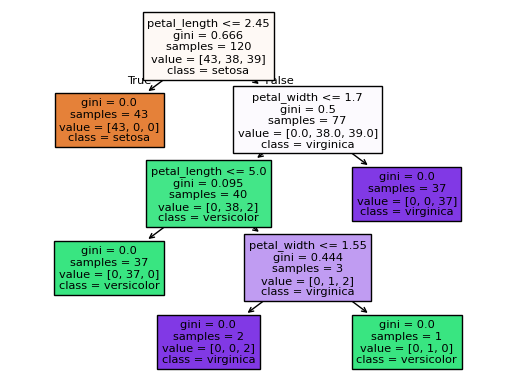

In [28]:
plot_tree(dmodel, feature_names = features, class_names = clas, filled = True)
plt.show()

In [ ]:
#depth: afu vanda muni kati level samma gako xa ie root ko lagi kati samma gayo ie 4 for root node


In [ ]:
#Overfitting

In [30]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
X = df[['Glucose', 'Age']]
y = df.Outcome

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [34]:
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [35]:
#test_accuracy
yprediction = dmodel.predict(xtest)

accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:68.83%


In [36]:
#train_accuracy

ypred_train = dmodel.predict(xtrain)

accuracy = accuracy_score(ytrain, ypred_train)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:97.72%


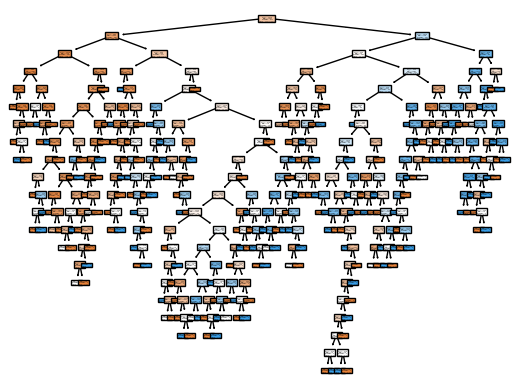

In [37]:
plot_tree(dmodel, filled = True)
plt.show()

In [ ]:
#ie training data ma high accuracy ayp o overfitting vayo aba overfitting lai control garne techniques haru

In [48]:
#controlling overfitting ie tree high depth ko baneko xa so ali kam depth ko tree banauna paryo
dmodel2 = DecisionTreeClassifier(max_depth = 9) #ie depth size diyera jati depth ko tree chaheko teti nai dinxa tree
dmodel2.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=9)

In [38]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(
 |      *,
 |      criterion='gini',
 |      splitter='best',
 |      max_depth=None,
 |      min_samples_split=2,
 |      min_samples_leaf=1,
 |      min_weight_fraction_leaf=0.0,
 |      max_features=None,
 |      random_state=None,
 |      max_leaf_nodes=None,
 |      min_impurity_decrease=0.0,
 |      class_weight=None,
 |      ccp_alpha=0.0,
 |      monotonic_cst=None
 |  )
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best",

In [49]:
yprediction = dmodel2.predict(xtest)

accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:70.78%


In [50]:
accuracy = accuracy_score(ytest, yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:70.78%


In [ ]:
#testing ko accuracy andhai xa bhane overfitting control vairaca

In [ ]:
#Grid search: deko parameter haru lai sab ai run garx ara best kun ayo teslai return gardinxa

In [51]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [57]:
dmodel3 = DecisionTreeClassifier()

In [62]:
#parameter haru ko dictionary anauxau ra parameter ko naame dession trree le vaneko ho
parameter = {
    'max_depth':[4,5,6,7]
}
#parameter lai dictionary banaune ho
#max_depth nai rakna paryo kina ki DecisionTreeClassifier ma mathi max_depth = 6 nai pass gareko vayera

In [69]:
grid_search = GridSearchCV(
    estimator =DecisionTreeClassifier(), 
    param_grid=parameter,
    scoring = 'accuracy',
    cv = 5
)
grid_search.fit(xtrain,ytrain)

#kun depth ma best accuracy auxa bhanera check garna lai grid_search gareko
#cv ie cross validation 
#estimator bhaneko kun model ie DecisioTreeclassifier
#scoring bhaneko accuracy ko based ma search garne

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7]}, scoring='accuracy')

In [71]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [75]:
grid_search.best_score_ # average accuracy bata  best kun xa tei deko

np.float64(0.7447154471544716)

In [ ]:
cv = 5
max_depth = 4:


  acc               acc1          acc2          acc3      acc4:  acc
#5 ota accuracy k =o average nikalera last acc nikalxa

In [ ]:
#decision tree ma aru pani parameter haru pani hunxa 


In [ ]:
#parameters of Decision tree

In [76]:
dmodel = DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [78]:
#decision tree ko paramter herna lai
dmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
max_depth = none ie by default jati samma ni tree baney raixa so decision tree banaune bela max_depth ko value dina paryo

In [ ]:
1.max_depth:
2.max_features:maximum kati ota features use garne tree banauna ko lagi as default sabai features use garxa
3.max_leaf_nodes:None leaf kati ota chahiyo bhanera ni dina milxa as default afai dinxa ie none rakhxa
4.min_samples_leaf:1 yesko default value 1  xa leaf ma min sample kati ota banna pauxa ie min_samples _leaf = 10 xa bhane sample 10 navaye samma leaf bamdaina
5.min_samples_split:2 node split hudai xa bhane min kati ota sample vaisake paxi split hune ie yo pani set garna milxa splt huna lai min 15 ota samples huna parxa hai



In [ ]:
#grid search use garna lai parameters haru lai dictionary kasari banaune ta

parameters = {
    'max_depth':[4,5,6,7],
    'min_samples_leaf':[10,15],
    
    
}